In [ ]:
pip install kaggle

In [ ]:
#Шаг №1
#Импорт библиотек необходимых для обработки данных и построения графиков

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#Шаг №2
# Импортируем данные с сайта 
from google.colab import files

In [ ]:
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#download data Скачиваем, все возможные данные по нашей задаче
!kaggle competitions download -c LANL-Earthquake-Prediction

  0% 0.00/320k [00:00<?, ?B/s]
100% 320k/320k [00:00<00:00, 47.0MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 108MB/s]
  0% 0.00/325k [00:00<?, ?B/s]
100% 325k/325k [00:00<00:00, 44.7MB/s]
  0% 0.00/321k [00:00<?, ?B/s]
100% 321k/321k [00:00<00:00, 98.1MB/s]
  0% 0.00/310k [00:00<?, ?B/s]
100% 310k/310k [00:00<00:00, 102MB/s]
  0% 0.00/324k [00:00<?, ?B/s]
100% 324k/324k [00:00<00:00, 106MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 107MB/s]
  0% 0.00/336k [00:00<?, ?B/s]
100% 336k/336k [00:00<00:00, 113MB/s]
  0% 0.00/330k [00:00<?, ?B/s]
100% 330k/330k [00:00<00:00, 103MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 99.0MB/s]
  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 110MB/s]
  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 103MB/s]
  0% 0.00/332k [00:00<?, ?B/s]
100% 332k/332k [00:00<00:00, 105MB/s]
  0% 0.00/324k [00:00<?, ?B/s]
100% 324k/324k [00:00<00:00, 44.1MB/s]
  0% 0.00/320k [00:00<?, ?B/s

In [ ]:
#Вывод списка того, что скачалось
!ls

sample_data	       seg_0042cc.csv  seg_006e4a.csv  seg_00e5f7.csv
sample_submission.csv  seg_004314.csv  seg_007a37.csv  seg_00f3b9.csv
seg_00030f.csv	       seg_004cd2.csv  seg_00a37e.csv  seg_010eab.csv
seg_0012b5.csv	       seg_004ee5.csv  seg_00be11.csv  seg_0125d9.csv
seg_00184e.csv	       seg_004f1f.csv  seg_00c35b.csv  train.csv.zip
seg_003339.csv	       seg_00648a.csv  seg_00cc91.csv


In [ ]:
 #Распаковываем тренировочные данные
!unzip train.csv.zip
!ls

Archive:  train.csv.zip
  inflating: train.csv               sample_data	       seg_0042cc.csv  seg_006e4a.csv  seg_00e5f7.csv
sample_submission.csv  seg_004314.csv  seg_007a37.csv  seg_00f3b9.csv
seg_00030f.csv	       seg_004cd2.csv  seg_00a37e.csv  seg_010eab.csv
seg_0012b5.csv	       seg_004ee5.csv  seg_00be11.csv  seg_0125d9.csv
seg_00184e.csv	       seg_004f1f.csv  seg_00c35b.csv  train.csv
seg_003339.csv	       seg_00648a.csv  seg_00cc91.csv  train.csv.zip


In [ ]:
#Помещаем тренировочные данные в переменную для дальнейшей работы с ними
train = pd.read_csv('train.csv', nrows=60000000, dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [ ]:
#Печатаем 10 первых строк файла train, с точностью 10 знаков после запятой
pd.options.display.precision = 10
train.tail(10000000)

,acoustic_data,time_to_failure
50000000,8,0.0219998349
50000001,4,0.0219998338
50000002,7,0.0219998327
50000003,2,0.0219998316
50000004,4,0.0219998305
...,...,...
59999995,6,11.6057980110
59999996,9,11.6057980100
59999997,6,11.6057980080
59999998,8,11.6057980070


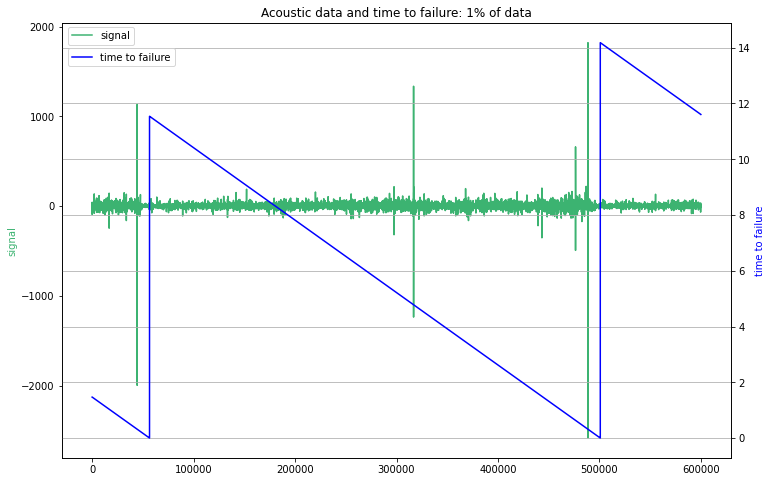

In [ ]:
training_acoustic_signal = train['acoustic_data'].values[::100]
training_time_to_failure = train['time_to_failure'].values[::100]

#Функция построения графиков на основе обоих признаков
def plot2(training_acoustic_signal, training_time_to_failure, title="Acoustic data and time to failure: 1% of data"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(training_acoustic_signal, color='mediumseagreen')
    ax1.set_ylabel('signal', color='mediumseagreen')
    plt.legend(['signal'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(training_time_to_failure, color='blue')
    ax2.set_ylabel('time to failure', color='blue')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot2(training_acoustic_signal, training_time_to_failure)

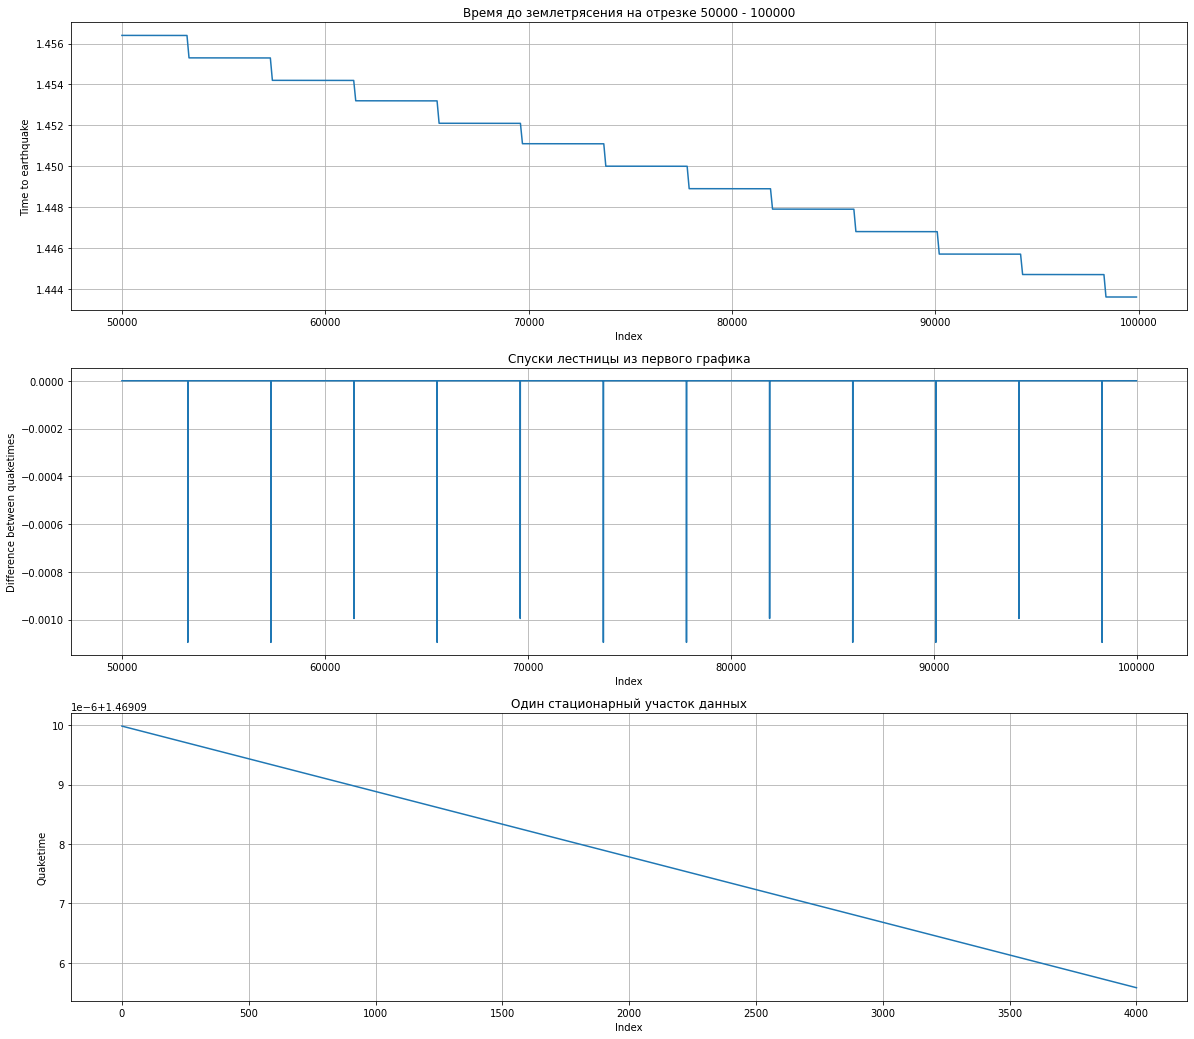

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[50000:100000:100], train.time_to_failure.values[50000:100000:100])
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to earthquake")
ax[0].set_title("Время до землетрясения на отрезке 50000 - 100000")
ax[0].grid()
#plt.grid(True)
ax[1].plot(train.index.values[50000:99999], np.diff(train.time_to_failure.values[50000:100000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Спуски лестницы из первого графика")
ax[1].grid()
#plt.grid(True)
ax[2].plot(train.index.values[0:4100:100], train.time_to_failure.values[0:4100:100])
ax[2].set_xlabel("Index")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("Один стационарный участок данных")
ax[2].grid()
#plt.grid(True)

In [ ]:
size_of_segment = 150000
num_segments = int(np.floor(train.shape[0]/size_of_segment))

train_x = pd.DataFrame(index=range(num_segments), dtype=np.float64)
train_y = pd.DataFrame(index=range(num_segments), dtype=np.float64, columns=['time_to_failure'])


In [ ]:
#std - вычислить стандартное отклонение данных (элементов массива) вдоль указанной оси (если есть).
#Стандартное отклонение (SD) измеряется как разброс распределения данных в данном наборе данных.
def features(segment, seg, train_X):
    X = pd.Series(seg['acoustic_data'].values)
    train_X.loc[segment, 'mean'] = X.mean() #записываем в переменную segment в колонку mean среднее значение
    train_X.loc[segment, 'std'] = X.std()
    train_X.loc[segment, 'max'] = X.max()
    train_X.loc[segment, 'min'] = X.min()
    
    train_X.loc[segment, 'mean_change_abs'] = np.mean(np.diff(X))
    train_X.loc[segment, 'abs_max'] = np.abs(X).max()
    train_X.loc[segment, 'abs_min'] = np.abs(X).min()
    
    train_X.loc[segment, 'std_first_50000'] = X[:50000].std()
    train_X.loc[segment, 'std_last_50000'] = X[-50000:].std()
    train_X.loc[segment, 'std_first_10000'] = X[:10000].std()
    train_X.loc[segment, 'std_last_10000'] = X[-10000:].std()
    
    train_X.loc[segment, 'avg_first_50000'] = X[:50000].mean()
    train_X.loc[segment, 'avg_last_50000'] = X[-50000:].mean()
    train_X.loc[segment, 'avg_first_10000'] = X[:10000].mean()
    train_X.loc[segment, 'avg_last_10000'] = X[-10000:].mean()
    
    train_X.loc[segment, 'max_first_50000'] = X[:50000].max()
    train_X.loc[segment, 'max_last_50000'] = X[-50000:].max()
    train_X.loc[segment, 'max_first_10000'] = X[:10000].max()
    train_X.loc[segment, 'max_last_10000'] = X[-10000:].max()

    train_X.loc[segment, 'min_first_50000'] = X[:50000].min()
    train_X.loc[segment, 'min_last_50000'] = X[-50000:].min()
    train_X.loc[segment, 'min_first_10000'] = X[:10000].min()
    train_X.loc[segment, 'min_last_10000'] = X[-10000:].min()
    
    
    
    train_X.loc[segment, 'max_to_min'] = X.max() / np.abs(X.min())
    train_X.loc[segment, 'max_to_min_diff'] = X.max() - np.abs(X.min())
    train_X.loc[segment, 'count_big'] = len(X[np.abs(X) > 500])
    train_X.loc[segment, 'sum'] = X.sum()
    

    train_X.loc[segment, 'q95'] = np.quantile(X, 0.95)
    train_X.loc[segment, 'q99'] = np.quantile(X, 0.99)
    train_X.loc[segment, 'q05'] = np.quantile(X, 0.05)
    train_X.loc[segment, 'q01'] = np.quantile(X, 0.01)
    
    train_X.loc[segment, 'abs_q95'] = np.quantile(np.abs(X), 0.95)
    train_X.loc[segment, 'abs_q99'] = np.quantile(np.abs(X), 0.99)
    train_X.loc[segment, 'abs_q05'] = np.quantile(np.abs(X), 0.05)
    train_X.loc[segment, 'abs_q01'] = np.quantile(np.abs(X), 0.01)
    

    train_X.loc[segment, 'abs_mean'] = np.abs(X).mean()
    train_X.loc[segment, 'abs_std'] = np.abs(X).std()
    
    train_X.loc[segment, 'mad'] = X.mad() #Среднее абсолютное отклонение. MAD определяется как среднее расстояние между каждым значением и средним.
    train_X.loc[segment, 'kurt'] = X.kurtosis() #Коэффициент эксцесса — мера остроты пика распределения случайной величины
    train_X.loc[segment, 'skew'] = X.skew() #Вычисляет асимметрию набора данных
    train_X.loc[segment, 'med'] = X.median() #Возвращает медиану (среднее значение) числовой последовательности
    

    train_X.loc[segment, 'Moving_average_700_mean'] = X.rolling(window=700).mean().mean(skipna=True) #Вычисляет скользящее среднее значений.Тип возвращаемого объекта определяется вызывающим объектом скользящего вычисления.
    ewma = pd.Series.ewm #Предоставляет экспоненциально взвешенные функции (EW).
    train_X.loc[segment, 'exp_Moving_average_300_mean'] = (ewma(X, span=300).mean()).mean(skipna=True)
    train_X.loc[segment, 'exp_Moving_average_3000_mean'] = ewma(X, span=3000).mean().mean(skipna=True)
    train_X.loc[segment, 'exp_Moving_average_30000_mean'] = ewma(X, span=30000).mean().mean(skipna=True)
    no_of_std = 3
    train_X.loc[segment, 'MA_700MA_std_mean'] = X.rolling(window=700).std().mean()
    train_X.loc[segment,'MA_700MA_BB_high_mean'] = (train_X.loc[segment, 'Moving_average_700_mean'] + no_of_std * train_X.loc[segment, 'MA_700MA_std_mean']).mean()
    train_X.loc[segment,'MA_700MA_BB_low_mean'] = (train_X.loc[segment, 'Moving_average_700_mean'] - no_of_std * train_X.loc[segment, 'MA_700MA_std_mean']).mean()
    train_X.loc[segment, 'MA_400MA_std_mean'] = X.rolling(window=400).std().mean()
    train_X.loc[segment,'MA_400MA_BB_high_mean'] = (train_X.loc[segment, 'Moving_average_700_mean'] + no_of_std * train_X.loc[segment, 'MA_400MA_std_mean']).mean()
    train_X.loc[segment,'MA_400MA_BB_low_mean'] = (train_X.loc[segment, 'Moving_average_700_mean'] - no_of_std * train_X.loc[segment, 'MA_400MA_std_mean']).mean()
    train_X.loc[segment, 'MA_1000MA_std_mean'] = X.rolling(window=1000).std().mean()
    train_X.drop('Moving_average_700_mean', axis=1, inplace=True)
    
    train_X.loc[segment, 'q999'] = np.quantile(X,0.999)
    train_X.loc[segment, 'q001'] = np.quantile(X,0.001)
    train_X.loc[segment, 'iqr'] = np.subtract(*np.percentile(X, [75, 25]))
    train_X.loc[segment, 'ave10'] = stats.trim_mean(X, 0.1)

    for windows in [10, 100, 1000]:
        X_roll_mean = X.rolling(windows).mean().dropna().values
        X_roll_std = X.rolling(windows).std().dropna().values
       
        
        
        train_X.loc[segment, 'ave_roll_mean_' + str(windows)] = X_roll_mean.mean()
        train_X.loc[segment, 'std_roll_mean_' + str(windows)] = X_roll_mean.std()
        train_X.loc[segment, 'max_roll_mean_' + str(windows)] = X_roll_mean.max()
        train_X.loc[segment, 'min_roll_mean_' + str(windows)] = X_roll_mean.min()
        train_X.loc[segment, 'q01_roll_mean_' + str(windows)] = np.quantile(X_roll_mean, 0.01)
        train_X.loc[segment, 'q05_roll_mean_' + str(windows)] = np.quantile(X_roll_mean, 0.05)
        train_X.loc[segment, 'q95_roll_mean_' + str(windows)] = np.quantile(X_roll_mean, 0.95)
        train_X.loc[segment, 'q99_roll_mean_' + str(windows)] = np.quantile(X_roll_mean, 0.99)
        train_X.loc[segment, 'av_change_abs_roll_mean_' + str(windows)] = np.mean(np.diff(X_roll_mean))
        train_X.loc[segment, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(X_roll_mean) / X_roll_mean[:-1]))[0])
        train_X.loc[segment, 'abs_max_roll_mean_' + str(windows)] = np.abs(X_roll_mean).max()

        train_X.loc[segment, 'ave_roll_std_' + str(windows)] = X_roll_std.mean()
        train_X.loc[segment, 'std_roll_std_' + str(windows)] = X_roll_std.std()
        train_X.loc[segment, 'max_roll_std_' + str(windows)] = X_roll_std.max()
        train_X.loc[segment, 'min_roll_std_' + str(windows)] = X_roll_std.min()
        train_X.loc[segment, 'q01_roll_std_' + str(windows)] = np.quantile(X_roll_std, 0.01)
        train_X.loc[segment, 'q05_roll_std_' + str(windows)] = np.quantile(X_roll_std, 0.05)
        train_X.loc[segment, 'q95_roll_std_' + str(windows)] = np.quantile(X_roll_std, 0.95)
        train_X.loc[segment, 'q99_roll_std_' + str(windows)] = np.quantile(X_roll_std, 0.99)
        train_X.loc[segment, 'av_change_abs_roll_std_' + str(windows)] = np.mean(np.diff(X_roll_std))
        train_X.loc[segment, 'av_change_rate_roll_std_' + str(windows)] = np.mean(np.nonzero((np.diff(X_roll_std) / X_roll_std[:-1]))[0])
        train_X.loc[segment, 'abs_max_roll_std_' + str(windows)] = np.abs(X_roll_std).max()
        


In [ ]:
from tqdm import tqdm, tqdm_notebook
from scipy import stats
for seg_id in tqdm_notebook(range(num_segments)):
    seg = train.iloc[seg_id*size_of_segment:seg_id*size_of_segment+size_of_segment]
    features(seg_id, seg, train_x)
    train_y.loc[seg_id, 'time_to_failure'] = seg['time_to_failure'].values[-1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/pytho

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x_scaled = pd.DataFrame(scaler.transform(train_x), columns=train_x.columns)
train_x_scaled.head()
train_x_scaled.tail()

,mean,std,max,min,mean_change_abs,abs_max,abs_min,std_first_50000,std_last_50000,std_first_10000,std_last_10000,avg_first_50000,avg_last_50000,avg_first_10000,avg_last_10000,max_first_50000,max_last_50000,max_first_10000,max_last_10000,min_first_50000,min_last_50000,min_first_10000,min_last_10000,max_to_min,max_to_min_diff,count_big,sum,q95,q99,q05,q01,abs_q95,abs_q99,abs_q05,abs_q01,abs_mean,abs_std,mad,kurt,skew,...,q01_roll_mean_100,q05_roll_mean_100,q95_roll_mean_100,q99_roll_mean_100,av_change_abs_roll_mean_100,av_change_rate_roll_mean_100,abs_max_roll_mean_100,ave_roll_std_100,std_roll_std_100,max_roll_std_100,min_roll_std_100,q01_roll_std_100,q05_roll_std_100,q95_roll_std_100,q99_roll_std_100,av_change_abs_roll_std_100,av_change_rate_roll_std_100,abs_max_roll_std_100,ave_roll_mean_1000,std_roll_mean_1000,max_roll_mean_1000,min_roll_mean_1000,q01_roll_mean_1000,q05_roll_mean_1000,q95_roll_mean_1000,q99_roll_mean_1000,av_change_abs_roll_mean_1000,av_change_rate_roll_mean_1000,abs_max_roll_mean_1000,ave_roll_std_1000,std_roll_std_1000,max_roll_std_1000,min_roll_std_1000,q01_roll_std_1000,q05_roll_std_1000,q95_roll_std_1000,q99_roll_std_1000,av_change_abs_roll_std_1000,av_change_rate_roll_std_1000,abs_max_roll_std_1000
395,0.8839477316,-0.1777693459,-0.1821855656,0.1628487916,-0.3429773467,-0.1817647891,0.0,-0.3153362516,-0.0312225658,-0.6147121332,1.0319530336,0.3259188555,1.3949164473,0.9846635416,1.1388112055,-0.2919994793,0.0425525987,-0.7683979518,1.6277958503,0.0860007340,-0.0648612965,0.7103314115,-1.6131503854,-0.2284689324,0.0098219237,-0.0826257332,0.8839477316,-0.3972071713,-0.2212262621,0.3946823090,0.2822837349,-0.1708716880,-0.1938918152,0.1601281538,0.0,-0.1538535919,-0.1664801918,-0.2815631254,-0.2402501710,0.0433342132,...,0.2238130861,0.7642520708,0.4342361708,-0.0574683392,-0.1653702120,0.1869710276,-0.1337852902,-0.2826188187,-0.1678613082,-0.1100822777,0.6731111310,-0.1749031591,-0.4617121736,-0.3168545410,-0.1473306738,-0.0924152794,0.1722404430,-0.1100822777,0.8789262654,-0.1771621161,-0.0531846437,0.1843213103,0.5104199285,0.7194366300,0.5545463374,0.2203833551,1.0252997244,0.8661219361,-0.0531846437,-0.2907750653,-0.1620585930,-0.1501380064,-0.0364062356,-0.4362444691,-0.5378230134,-0.3346572260,-0.1491472311,0.0014794643,0.8647311168,-0.1501380064
396,1.3970573695,-0.2262236927,-0.1709976695,0.2447976602,-0.6914725338,-0.1724175534,0.0,-0.4433129334,-0.0663914692,-0.7628301385,-0.6216099439,0.8182571411,1.2138779958,1.7424631105,1.7544382073,-0.5631831044,0.0577953206,-0.7936617345,-0.7006040239,0.5076763115,0.0842108627,0.8148976328,0.6769348962,1.6848898105,0.3421649611,-0.0826257332,1.3970573695,-0.3972071713,-0.2833667250,0.3946823090,0.3458243020,-0.3791882842,-0.2480509728,0.1601281538,0.0,-0.1689373761,-0.2069910185,-0.3671625764,-0.4138958501,0.4824815410,...,0.2826901385,1.2113339437,0.6585510245,-0.0221756027,-0.2134779100,1.1122863350,-0.0846882794,-0.3623937783,-0.2271032632,-0.2216508428,-0.5773023799,-0.5543021255,-0.7726696957,-0.4541657443,-0.2033390449,0.0558982029,1.0980794176,-0.2216508428,1.3916721188,-0.2857760329,-0.0743715987,0.1201158887,0.8000198879,1.2509575841,0.8559365164,0.3026810887,0.0674342580,1.1810336440,-0.0743715987,-0.3876406225,-0.2178511692,-0.1753511119,-0.4271062141,-0.5219648665,-0.7002506862,-0.5908171506,-0.1979377608,0.3152553366,1.1797352527,-0.1753511119
397,1.5661715098,-0.2552495668,-0.3723798002,0.3267465288,-0.1106472219,-0.3406677974,0.0,-0.3421878007,-0.1789545843,-0.7815671465,-0.2781560746,2.1742833279,0.3046381307,1.0549873416,0.5926068210,-0.4627447248,-0.2572209325,-0.8694530827,-0.3269102169,0.4233411960,0.2392459083,0.8671807434,0.5051785001,0.2030274022,-0.0020474705,-0.0826257332,1.5661715098,-0.3972071713,-0.3455071879,0.7903537967,0.3458243020,-0.3791882842,-0.2480509728,0.1601281538,0.0,-0.1835754679,-0.2324109075,-0.4032478933,-0.8387608634,0.0214979657,...,0.2505753827,1.0049884639,1.1819523496,0.0366456247,0.9411068426,-0.237626885

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/test

 seg_00030f.csv        seg_421da1.csv   seg_8456d3.csv	      seg_c179f8.csv
 seg_0012b5.csv        seg_423ebe.csv   seg_845a2a.csv	      seg_c183e4.csv
 seg_00184e.csv        seg_425462.csv   seg_8472f3.csv	      seg_c186dc.csv
 seg_003339.csv        seg_42648c.csv   seg_848695.csv	      seg_c18d5a.csv
 seg_0042cc.csv        seg_4280d9.csv   seg_84a65d.csv	      seg_c1fe9a.csv
 seg_004314.csv        seg_428d66.csv   seg_84b9d9.csv	      seg_c20a27.csv
 seg_004cd2.csv        seg_42c4c9.csv   seg_84c7fb.csv	      seg_c20c06.csv
 seg_004ee5.csv        seg_42e7e8.csv   seg_84fc12.csv	      seg_c21723.csv
 seg_004f1f.csv        seg_42ff14.csv   seg_8509db.csv	      seg_c21d60.csv
 seg_00648a.csv        seg_430e66.csv   seg_850d95.csv	      seg_c22bd4.csv
 seg_006e4a.csv        seg_43383f.csv   seg_8515fd.csv	      seg_c23429.csv
 seg_007a37.csv        seg_434c96.csv   seg_853302.csv	      seg_c23641.csv
 seg_00a37e.csv        seg_43597f.csv   seg_854d91.csv	      seg_c243a6.csv
 seg_00be11.

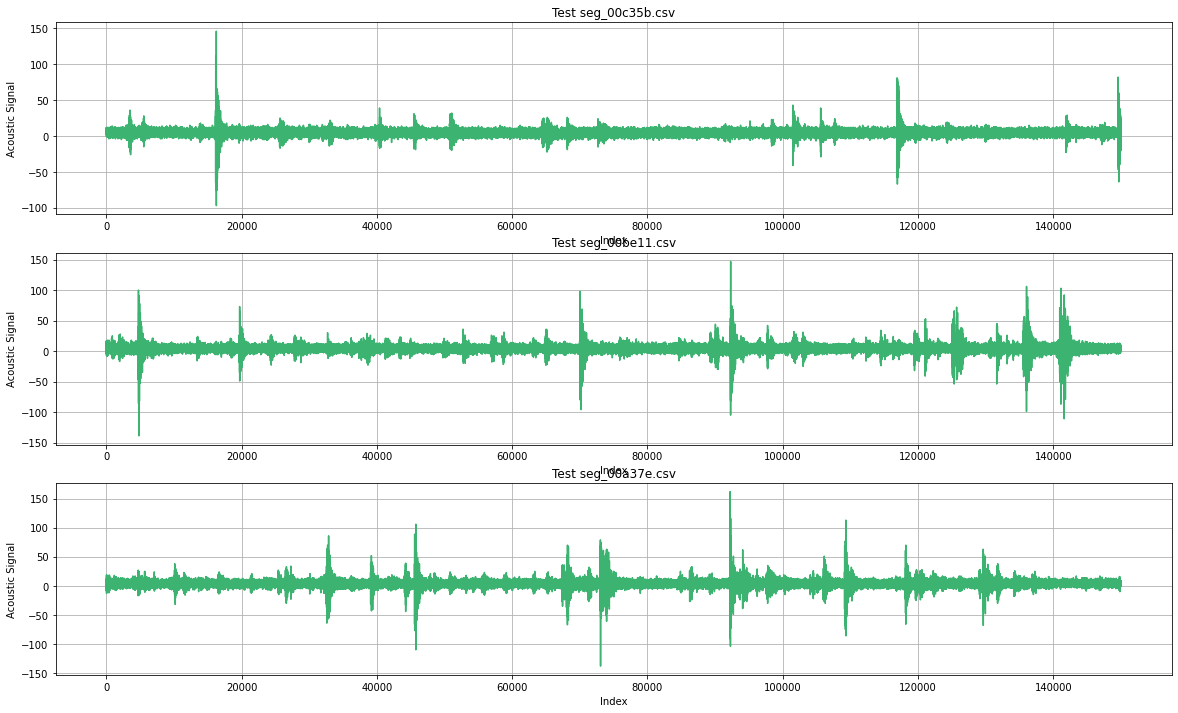

In [ ]:
test1 = pd.read_csv('seg_00c35b.csv', nrows=150000, dtype={'acoustic_data': np.int16})
test2 = pd.read_csv('seg_00be11.csv', nrows=150000, dtype={'acoustic_data': np.int16})
test3 = pd.read_csv('seg_00a37e.csv', nrows=150000, dtype={'acoustic_data': np.int16})
fig, ax = plt.subplots(3,1, figsize=(20,12))
ax[0].plot(test1.index.values, test1.acoustic_data.values, c="mediumseagreen")
ax[0].set_title("Test seg_00c35b.csv")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Acoustic Signal");
ax[0].grid()

ax[1].plot(test2.index.values, test2.acoustic_data.values, c="mediumseagreen")
ax[1].set_title("Test seg_00be11.csv")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Acoustic Signal");
ax[1].grid()

ax[2].plot(test3.index.values, test3.acoustic_data.values, c="mediumseagreen")
ax[2].set_title("Test seg_00a37e.csv")
ax[2].set_xlabel("Index")
ax[2].set_ylabel("Acoustic Signal");
ax[2].grid()

In [ ]:
submission_file = pd.read_csv('sample_submission.csv',index_col='seg_id')
submission_file

test_X = pd.DataFrame(columns=train_x.columns,index=submission_file.index,dtype=np.float64)

for seg_id in tqdm_notebook(test_X.index):
    seg = pd.read_csv('/content/drive/MyDrive/test/' + seg_id + '.csv')
    features(seg_id, seg, test_X)

test_X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/pytho

,mean,std,max,min,mean_change_abs,abs_max,abs_min,std_first_50000,std_last_50000,std_first_10000,std_last_10000,avg_first_50000,avg_last_50000,avg_first_10000,avg_last_10000,max_first_50000,max_last_50000,max_first_10000,max_last_10000,min_first_50000,min_last_50000,min_first_10000,min_last_10000,max_to_min,max_to_min_diff,count_big,sum,q95,q99,q05,q01,abs_q95,abs_q99,abs_q05,abs_q01,abs_mean,abs_std,mad,kurt,skew,...,q01_roll_mean_100,q05_roll_mean_100,q95_roll_mean_100,q99_roll_mean_100,av_change_abs_roll_mean_100,av_change_rate_roll_mean_100,abs_max_roll_mean_100,ave_roll_std_100,std_roll_std_100,max_roll_std_100,min_roll_std_100,q01_roll_std_100,q05_roll_std_100,q95_roll_std_100,q99_roll_std_100,av_change_abs_roll_std_100,av_change_rate_roll_std_100,abs_max_roll_std_100,ave_roll_mean_1000,std_roll_mean_1000,max_roll_mean_1000,min_roll_mean_1000,q01_roll_mean_1000,q05_roll_mean_1000,q95_roll_mean_1000,q99_roll_mean_1000,av_change_abs_roll_mean_1000,av_change_rate_roll_mean_1000,abs_max_roll_mean_1000,ave_roll_std_1000,std_roll_std_1000,max_roll_std_1000,min_roll_std_1000,q01_roll_std_1000,q05_roll_std_1000,q95_roll_std_1000,q99_roll_std_1000,av_change_abs_roll_std_1000,av_change_rate_roll_std_1000,abs_max_roll_std_1000
seg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
seg_00030f,4.4917800000,4.8936896870,115.0,-75.0,0.0000266668,115.0,0.0,5.3504510345,4.7938756205,5.2268463104,6.0190170798,4.46644,4.49598,4.3842,4.2675,115.0,43.0,45.0,43.0,-75.0,-37.0,-36.0,-37.0,1.5333333333,40.0,0.0,673767.0,11.0,18.0,-2.0,-8.0,11.0,19.0,1.0,0.0,5.2246066667,4.1021608976,3.2485210541,28.8375680992,0.3279076353,...,3.48,3.83,5.15,5.48,0.0000004670,75004.5413771825,10.42,4.0224047483,2.7992324933,50.4899980094,2.0150945538,2.3436783659,2.5149853906,8.3622226517,16.0264270390,-0.0000118589,75008.2618433949,50.4899980094,4.4914683190,0.2318909797,5.495,3.774,3.889,4.099,4.867,5.000,0.0000017785,74583.5961588826,5.495,4.2376624304,2.4395703055,24.7172467376,2.4907436247,2.6511289076,2.7501904566,8.5082560740,13.1559521920,-0.0000340741,74583.7498617739,24.7172467376
seg_0012b5,4.1711533333,5.9228394432,152.0,-140.0,-0.0000133334,152.0,0.0,6.2495153531,4.1475623120,3.5232526280,3.6051473560,4.01786,4.24444,4.0635,4.1285,152.0,49.0,22.0,40.0,-140.0,-36.0,-12.0,-19.0,1.0857142857,12.0,0.0,625673.0,11.0,20.0,-2.0,-12.0,12.0,24.0,1.0,0.0,5.1983400000,5.0453685973,3.4292084979,56.2189545505,0.2957078592,...,3.13,3.50,4.83,5.24,-0.0000010674,74810.3078308484,11.90,4.2699613648,4.1216308748,58.3733118416,2.0369069441,2.3110406943,2.4756592837,9.9547257951,24.1731527346,-0.0000243321,74815.3923271911,58.3733118416,4.1736328213,0.2309136613,5.009,3.342,3.644,3.790,4.541,4.739,-0.0000001946,74346.8332847969,5.009,4.5959508500,3.7533878612,29.6803109292,2.5409319816,2.6379983008,2.7063990089,10.9333461052,24.3313469715,-0.0000065522,74347.2808308942,29.6803109292
seg_00184e,4.6102600000,6.9469900775,248.0,-193.0,-0.0000200001,248.0,0.0,9.7934730004,5.2259134860,3.9501186443,3.0630570337,4.55518,4.55380,4.2452,4.7272,248.0,92.0,49.0,19.0,-193.0,-78.0,-26.0,-8.0,1.2849740933,55.0,0.0,691539.0,11.0,20.0,-2.0,-11.0,12.0,25.0,1.0,0.0,5.5971933333,6.1795249035,3.4619840107,162.1182836284,0.4286882883,...,3.48,3.90,5.27,5.66,-0.0000020680,74886.4111024591,19.11,4.3012273154,5.4771724950,106.2967349385,1.9745860070,2.3125481158,2.4756388830,8.8703569445,26.8856069038,-0.0000005063,74886.3670232897,106.2967349385,4.6124554131,0.2472192612,6.234,3.544,4.013,4.215,4.966,5.082,0.0000000805,74349.4644588517,6.234,4.6849671030,5.1542678755,53.0692922581,2.5024574508,2.6141793997,2.6764667893,10.0849993164,31.0753934179,0.0000006882,74348.9296306302,53.0692922581
seg_003339,4.5314733333,4.1141466030,85.0,-93.0,0.0000466670,93.0,0.0,3.6640876955,3.4808398579,4.0012754792,2.7711848922,4.49052,4.48922,4.3834,4.4668,51.0,72.0,34.0,15.0,-30.0,-54.0,-23.0,-7.0,0.9139784946,-8.0,0.0,679721.0,10.0,14.0,-1.0,-5.0,10.0,16.0,1.0,0.0,4.96148666

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: invalid value encountered in true_divide


,mean,std,max,min,mean_change_abs,abs_max,abs_min,std_first_50000,std_last_50000,std_first_10000,std_last_10000,avg_first_50000,avg_last_50000,avg_first_10000,avg_last_10000,max_first_50000,max_last_50000,max_first_10000,max_last_10000,min_first_50000,min_last_50000,min_first_10000,min_last_10000,max_to_min,max_to_min_diff,count_big,sum,q95,q99,q05,q01,abs_q95,abs_q99,abs_q05,abs_q01,abs_mean,abs_std,mad,kurt,skew,...,q01_roll_mean_100,q05_roll_mean_100,q95_roll_mean_100,q99_roll_mean_100,av_change_abs_roll_mean_100,av_change_rate_roll_mean_100,abs_max_roll_mean_100,ave_roll_std_100,std_roll_std_100,max_roll_std_100,min_roll_std_100,q01_roll_std_100,q05_roll_std_100,q95_roll_std_100,q99_roll_std_100,av_change_abs_roll_std_100,av_change_rate_roll_std_100,abs_max_roll_std_100,ave_roll_mean_1000,std_roll_mean_1000,max_roll_mean_1000,min_roll_mean_1000,q01_roll_mean_1000,q05_roll_mean_1000,q95_roll_mean_1000,q99_roll_mean_1000,av_change_abs_roll_mean_1000,av_change_rate_roll_mean_1000,abs_max_roll_mean_1000,ave_roll_std_1000,std_roll_std_1000,max_roll_std_1000,min_roll_std_1000,q01_roll_std_1000,q05_roll_std_1000,q95_roll_std_1000,q99_roll_std_1000,av_change_abs_roll_std_1000,av_change_rate_roll_std_1000,abs_max_roll_std_1000
seg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
seg_00030f,4.4917800000,4.8936896870,115.0,-75.0,0.0000266668,115.0,0.0,5.3504510345,4.7938756205,5.2268463104,6.0190170798,4.46644,4.49598,4.3842,4.2675,115.0,43.0,45.0,43.0,-75.0,-37.0,-36.0,-37.0,1.5333333333,40.0,0.0,673767.0,11.0,18.0,-2.0,-8.0,11.0,19.0,1.0,0.0,5.2246066667,4.1021608976,3.2485210541,28.8375680992,0.3279076353,...,3.48,3.83,5.15,5.48,0.0000004670,75004.5413771825,10.42,4.0224047483,2.7992324933,50.4899980094,2.0150945538,2.3436783659,2.5149853906,8.3622226517,16.0264270390,-0.0000118589,75008.2618433949,50.4899980094,4.4914683190,0.2318909797,5.495,3.774,3.889,4.099,4.867,5.000,0.0000017785,74583.5961588826,5.495,4.2376624304,2.4395703055,24.7172467376,2.4907436247,2.6511289076,2.7501904566,8.5082560740,13.1559521920,-0.0000340741,74583.7498617739,24.7172467376
seg_0012b5,4.1711533333,5.9228394432,152.0,-140.0,-0.0000133334,152.0,0.0,6.2495153531,4.1475623120,3.5232526280,3.6051473560,4.01786,4.24444,4.0635,4.1285,152.0,49.0,22.0,40.0,-140.0,-36.0,-12.0,-19.0,1.0857142857,12.0,0.0,625673.0,11.0,20.0,-2.0,-12.0,12.0,24.0,1.0,0.0,5.1983400000,5.0453685973,3.4292084979,56.2189545505,0.2957078592,...,3.13,3.50,4.83,5.24,-0.0000010674,74810.3078308484,11.90,4.2699613648,4.1216308748,58.3733118416,2.0369069441,2.3110406943,2.4756592837,9.9547257951,24.1731527346,-0.0000243321,74815.3923271911,58.3733118416,4.1736328213,0.2309136613,5.009,3.342,3.644,3.790,4.541,4.739,-0.0000001946,74346.8332847969,5.009,4.5959508500,3.7533878612,29.6803109292,2.5409319816,2.6379983008,2.7063990089,10.9333461052,24.3313469715,-0.0000065522,74347.2808308942,29.6803109292
seg_00184e,4.6102600000,6.9469900775,248.0,-193.0,-0.0000200001,248.0,0.0,9.7934730004,5.2259134860,3.9501186443,3.0630570337,4.55518,4.55380,4.2452,4.7272,248.0,92.0,49.0,19.0,-193.0,-78.0,-26.0,-8.0,1.2849740933,55.0,0.0,691539.0,11.0,20.0,-2.0,-11.0,12.0,25.0,1.0,0.0,5.5971933333,6.1795249035,3.4619840107,162.1182836284,0.4286882883,...,3.48,3.90,5.27,5.66,-0.0000020680,74886.4111024591,19.11,4.3012273154,5.4771724950,106.2967349385,1.9745860070,2.3125481158,2.4756388830,8.8703569445,26.8856069038,-0.0000005063,74886.3670232897,106.2967349385,4.6124554131,0.2472192612,6.234,3.544,4.013,4.215,4.966,5.082,0.0000000805,74349.4644588517,6.234,4.6849671030,5.1542678755,53.0692922581,2.5024574508,2.6141793997,2.6764667893,10.0849993164,31.0753934179,0.0000006882,74348.9296306302,53.0692922581
seg_003339,4.5314733333,4.1141466030,85.0,-93.0,0.0000466670,93.0,0.0,3.6640876955,3.4808398579,4.0012754792,2.7711848922,4.49052,4.48922,4.3834,4.4668,51.0,72.0,34.0,15.0,-30.0,-54.0,-23.0,-7.0,0.9139784946,-8.0,0.0,679721.0,10.0,14.0,-1.0,-5.0,10.0,16.0,1.0,0.0,4.96148666

In [ ]:
scaler.fit(test_X)
test_X_scaled = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns, index = submission_file.index)
test_X_scaled.head()

,mean,std,max,min,mean_change_abs,abs_max,abs_min,std_first_50000,std_last_50000,std_first_10000,std_last_10000,avg_first_50000,avg_last_50000,avg_first_10000,avg_last_10000,max_first_50000,max_last_50000,max_first_10000,max_last_10000,min_first_50000,min_last_50000,min_first_10000,min_last_10000,max_to_min,max_to_min_diff,count_big,sum,q95,q99,q05,q01,abs_q95,abs_q99,abs_q05,abs_q01,abs_mean,abs_std,mad,kurt,skew,...,q01_roll_mean_100,q05_roll_mean_100,q95_roll_mean_100,q99_roll_mean_100,av_change_abs_roll_mean_100,av_change_rate_roll_mean_100,abs_max_roll_mean_100,ave_roll_std_100,std_roll_std_100,max_roll_std_100,min_roll_std_100,q01_roll_std_100,q05_roll_std_100,q95_roll_std_100,q99_roll_std_100,av_change_abs_roll_std_100,av_change_rate_roll_std_100,abs_max_roll_std_100,ave_roll_mean_1000,std_roll_mean_1000,max_roll_mean_1000,min_roll_mean_1000,q01_roll_mean_1000,q05_roll_mean_1000,q95_roll_mean_1000,q99_roll_mean_1000,av_change_abs_roll_mean_1000,av_change_rate_roll_mean_1000,abs_max_roll_mean_1000,ave_roll_std_1000,std_roll_std_1000,max_roll_std_1000,min_roll_std_1000,q01_roll_std_1000,q05_roll_std_1000,q95_roll_std_1000,q99_roll_std_1000,av_change_abs_roll_std_1000,av_change_rate_roll_std_1000,abs_max_roll_std_1000
seg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
seg_00030f,1.3602626454,-0.2047898189,-0.1833281333,0.2715217513,0.4571183104,-0.1882420596,0.0,-0.0954686137,-0.2974019935,-0.0387985413,0.1156572820,1.1606024907,1.2804822635,0.7427938441,0.3796486414,0.0080619765,-0.5990353285,-0.0848631940,-0.1455790687,0.1049761728,0.5690778538,0.0792378389,0.0939092121,1.8769777011,0.4045960082,-0.0698929412,1.3602626454,0.0004718856,-0.1651494699,0.2865031382,0.2741005359,-0.2221033417,-0.1947867517,0.90746269,0.0,-0.0520933669,-0.2027490748,-0.1731977370,-0.5840683362,0.4760881635,...,0.3099747879,1.1855848985,1.0016388839,0.0597956217,0.1044479505,0.4103613021,-0.1217539839,-0.1829650649,-0.2366752541,-0.1956295759,0.8137707517,0.5789643880,0.4730701737,-0.2874231283,-0.2067054056,-0.2068598839,0.4076393228,-0.1956295759,1.3587492740,-0.1232896568,0.0477399377,0.2293472808,0.6394519009,1.2861961401,1.1474636480,0.6100190393,0.7095544442,0.5631806927,0.0477399377,-0.2200169450,-0.2338863205,-0.1937832977,-0.5151514583,0.5126455238,0.5290712089,-0.4470375141,-0.2455370754,-0.7862834112,0.5630521314,-0.1937832977
seg_0012b5,0.0893369943,-0.0870781104,-0.0494953152,0.0483997811,-0.2684458270,-0.0682653965,0.0,-0.0315439555,-0.4539023786,-0.1874730032,-0.4103598552,-0.4937288472,0.3574933270,-0.2994208915,-0.0699837268,0.1546115314,-0.5384386129,-0.3282651274,-0.1967648487,-0.1359573799,0.5796230304,0.3184211848,0.4189747970,-0.2423779990,0.0059253640,-0.0698929412,0.0893369943,0.0004718856,-0.0291783461,0.2865031382,0.0056345626,0.0065170759,-0.0462076482,0.90746269,0.0,-0.0684898950,-0.0927576147,-0.0668431649,-0.1814763892,0.4028328178,...,0.1155299559,0.1355581264,-0.0203253656,-0.0819528189,-0.2270610008,-1.0766270850,-0.0708044566,-0.0645981890,-0.0830404870,-0.1406125281,1.0991959059,0.1038413358,0.0313845343,-0.0008854322,-0.0412615478,-0.4204148088,-1.0647402501,-0.1406125281,0.0992691632,-0.1289025283,-0.0786597134,0.0903801937,0.1557120436,0.1764464457,-0.0333074674,0.0387099169,-0.0548179928,-1.0545354258,-0.0786597134,-0.0655978219,-0.0810812790,-0.1356876548,0.2738648930,0.3239448224,0.0775797584,-0.0326090896,-0.0395529248,-0.1464972829,-1.0514676295,-0.1356876548
seg_00184e,1.8299031551,0.0300618104,0.2977465911,-0.1335304409,-0.3893731832,0.2430254048,0.0,0.2204361052,-0.1927869540,-0.1502199446,-0.5284891796,1.4878693393,1.4926442270,0.2910699643,1.8666702220,0.5348482144,-0.1041621515,-0.0425324230,-0.5550653087,-0.3324108920,0.1367256101,0.1788975664,0.6176259878,0.7010635528,0.6181695676,-0.0698929412,1.8299031551,0.0004718856,-0.0291783461,0.2865031382,0.0727510559,0.0065170759,-0.0164918275,0.90746269,0.0,0.1804876399,0.0395011741,-0.0475511457,1.3755746809,0.705

In [33]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [35]:
model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200, loss='huber')
num_folds = 5
cross_validate_results = cross_validate(model, train_x_scaled, train_y.values.flatten(), n_jobs=-1, return_estimator= True, return_train_score=True, cv=num_folds, verbose=50, scoring="neg_mean_absolute_error" )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    7.8s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished


In [36]:
cross_validate_results.keys()

dict_keys(['fit_time', 'score_time', 'estimator', 'test_score', 'train_score'])

In [37]:
cross_validate_results.values()

dict_values([array([2.92445135, 2.89336658, 2.89145207, 2.87237477, 1.96363688]), array([0.00261259, 0.00280094, 0.0022831 , 0.00244951, 0.00155783]), (GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_

In [38]:
for i in range(num_folds):
    print("Fold: {} Training MAE: {}".format(i,-cross_validate_results['train_score'][i]))
    print("Fold: {} Validation MAE: {}".format(i,-cross_validate_results['test_score'][i]))

Fold: 0 Training MAE: 0.17988971744998034
Fold: 0 Validation MAE: 2.638715961458528
Fold: 1 Training MAE: 0.21762083399849183
Fold: 1 Validation MAE: 2.5338661911841185
Fold: 2 Training MAE: 0.16848028927976494
Fold: 2 Validation MAE: 2.9402824929369613
Fold: 3 Training MAE: 0.2674703040266061
Fold: 3 Validation MAE: 1.457410427359115
Fold: 4 Training MAE: 0.15582967731580405
Fold: 4 Validation MAE: 3.576121687529688


In [47]:
new_model = cross_validate_results['estimator'][3]
predictions = new_model.predict(train_x_scaled)

new_model

mean_absolute_error(train_y.values.flatten(), predictions)


0.5054583286931078

In [49]:
test_predictions = new_model.predict(test_X_scaled)
submission_file['time_to_failure'] = test_predictions
submission_file.to_csv('submission.csv')
test_predictions

array([1.55370205, 4.24418591, 5.17039658, ..., 3.70370527, 3.17298332,
       1.59511481])

In [51]:
from IPython.display import HTML
import base64


def create_download_link(df, title = "Download CSV file", filename = "data_1.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

submission_file['time_to_failure'] = test_predictions

In [46]:
create_download_link(submission_file)